**Problem Set 2**
**Liam Trevor C. Lim, 2022-13237**

# Figure 2: Hydrodams in South Africa but instead of the river gradient, use the population density instead.

In [1]:
!pip install mapclassify

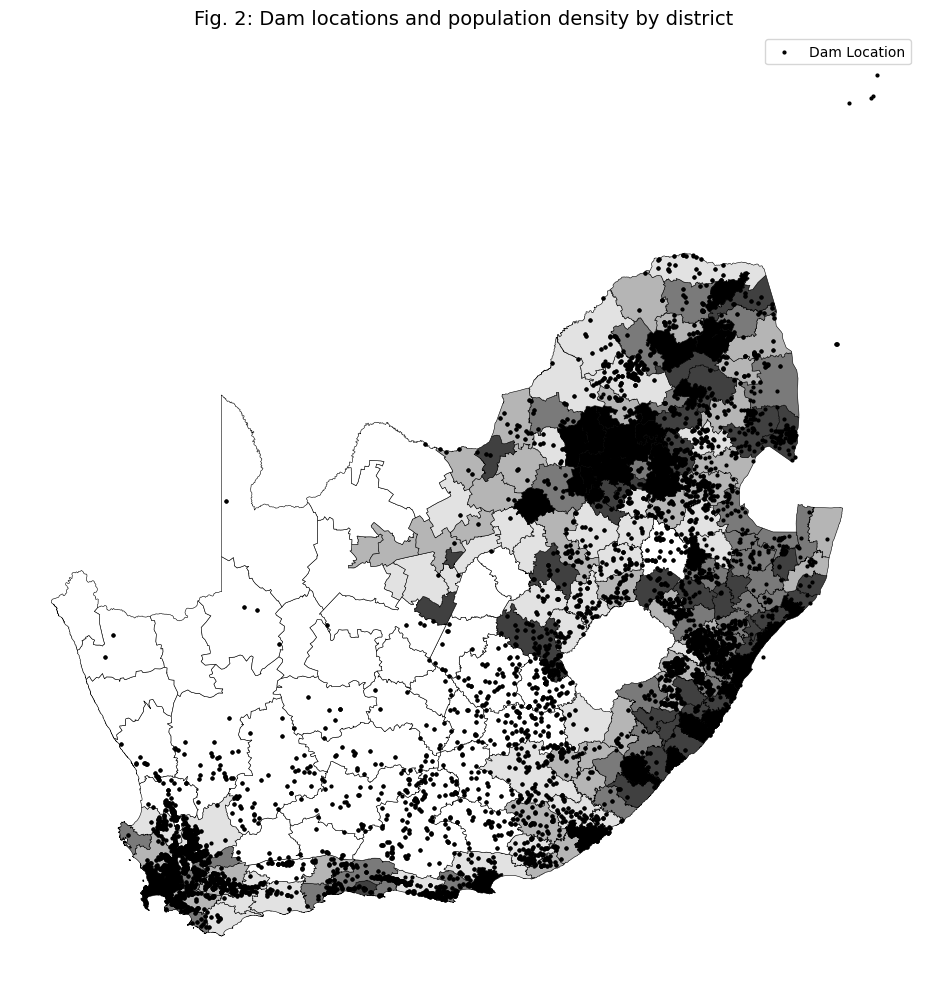

In [2]:
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mapclassify

#load shapefle
shapefile_path = r"C:\\Users\\liamt\\Documents\\GitHub\\problem-set-2\\Problem Set 2\\Data\\South Africa\\SA_MDB_Local_Municipal_Boundary_2018"
districts = gpd.read_file(shapefile_path)
districts = districts.to_crs(epsg=4326)  # Match raster

#calculate area by km^2
districts_proj = districts.to_crs(epsg=3395)
districts['area_km2'] = districts_proj.geometry.area / 1e6

#load population density from WorldPop
raster_path = r"C:\\Users\\liamt\\Documents\\GitHub\\problem-set-2\\Problem Set 2\\Data\\South Africa\\zaf_ppp_2020_constrained.tif"
stats = zonal_stats(vectors=districts, raster=raster_path, stats=["sum"], geojson_out=True)

#build geodataframe
pop_density_gdf = gpd.GeoDataFrame.from_features(stats)
pop_density_gdf = pop_density_gdf.set_geometry('geometry')
pop_density_gdf['population'] = pop_density_gdf['sum']
pop_density_gdf['pop_density'] = pop_density_gdf['population'] / districts['area_km2']
pop_density_gdf['pop_density_log'] = np.log10(pop_density_gdf['pop_density'].replace(0, np.nan))

#load and convert dam locations
dams = pd.read_excel(r"C:\\Users\\liamt\\Documents\\GitHub\\problem-set-2\\Problem Set 2\\Data\\South Africa\\Dams_south_africa.xlsx")
dams['Latitude'] = - (dams['Latitude deg'] + dams['Lat min'] / 60 + dams['Lat sec'] / 3600)
dams['Longitude'] = dams['Longitude deg'] + dams['Long min'] / 60 + dams['Long sec'] / 3600
dams_gdf = gpd.GeoDataFrame(dams, geometry=gpd.points_from_xy(dams['Longitude'], dams['Latitude']), crs="EPSG:4326")

#plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

#population density details
pop_density_gdf.plot(column='pop_density_log',cmap='Greys',scheme='quantiles',k=6,linewidth=0.4,edgecolor='black',legend=True,ax=ax,missing_kwds={"color": "lightgrey", "label": "No data"})

#plot dam locations as dots
dams_gdf.plot(ax=ax, color='black', markersize=4, label='Dam Location')

#labels and stuff
ax.set_title("Fig. 2: Dam locations and population density by district", fontsize=14)
ax.set_axis_off()
plt.legend()
plt.tight_layout()
plt.show()


I installed a mapclassify package to help classify numeric data into groups, especially since the figure looks like a choropleth. I used standard geospatial and plotting libraries such as geopandas to help handle the shapefiles, rasterio and zonal_stats which helps with raster data, matplotlib for plotting and mapclassify for the choropleth maps. Then, I used standard procedure to load the South African district boundary shapefile which was easy to find online. Then, I calculated the area for each district. I also extracted the population per district from Raster. Then after that, I built a GeoDataFrame from the statistics that I just mentioned beforehand. After that I loaded the dam locations from an Excel file that was also easy to find online. I then converted them to decimal degrees and built a specific GeoDataFrame for the dam points. Then with the plotting, it was really trial and error for me. I started with the matplotlib plot to create a choropleth map of the population density. I used scheme='quantiles' with k=6 to split the data into 6 equal-sized groups for a somewhat close recreation of the grayscale detail. However, to make up with the areas with no data I used missing_kwds to ensure areas with no data as light gray. I also used dams_gdf.plot(ax=ax, color='black', markersize=4, label='Dam Location') for the black dots for the dam locations. Then I used some familiar coding for the titles, legends etc. for a cleaner map appearance.

Notes for improvement: I can't seem to figure out how to add grayish parts on the other areas.

# Figure 4: Ethiopian Population density and ERSS Sample Villages

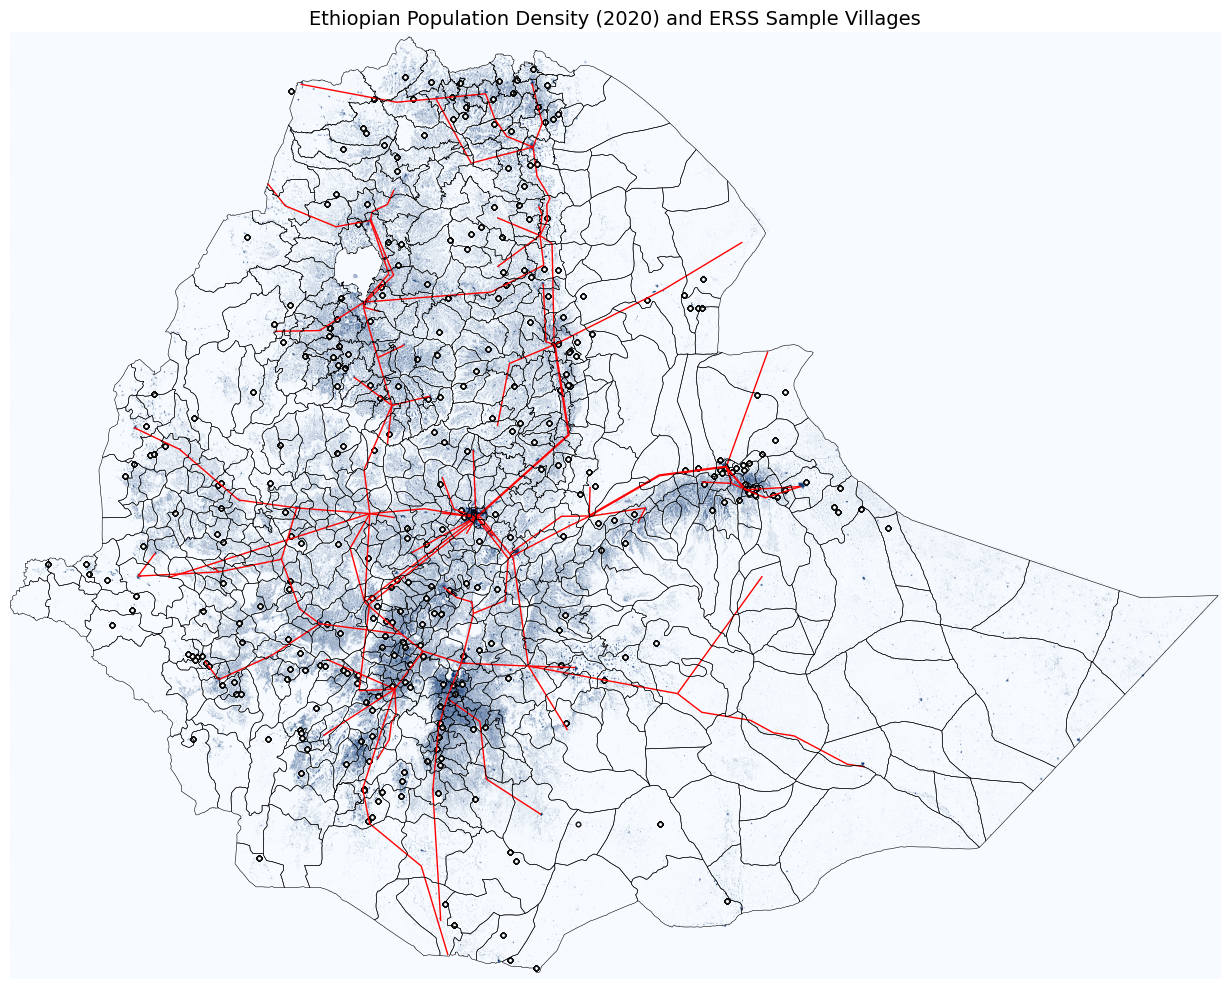

In [3]:
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

#load data
raster_path = r"C:\Users\liamt\Documents\GitHub\problem-set-2\Problem Set 2\Data\Ethiopia\eth_ppp_2020_constrained.tif"
village_data_path = r"C:\Users\liamt\Documents\GitHub\problem-set-2\Problem Set 2\Data\Ethiopia\ETH_2011_ERSS_v02_M_CSV\pub_eth_householdgeovariables_y1.csv"
admin_shapefile = r"C:\Users\liamt\Documents\GitHub\problem-set-2\Problem Set 2\Data\Ethiopia\Ethiopia_AdminBoundaries-shp"
grid_shapefile = r"C:\Users\liamt\Documents\GitHub\problem-set-2\Problem Set 2\Data\Ethiopia\ethiopia-electricity-transmission-network\Ethiopia Electricity Transmission Network.shp"

raster = rasterio.open(raster_path)
pop_data = raster.read(1)
extent = [raster.bounds.left, raster.bounds.right, raster.bounds.bottom, raster.bounds.top]

admin_gdf = gpd.read_file(admin_shapefile).to_crs(raster.crs)
villages_df = pd.read_csv(village_data_path)
villages_gdf = gpd.GeoDataFrame(villages_df, geometry=gpd.points_from_xy(villages_df["LON_DD_MOD"], villages_df["LAT_DD_MOD"]),crs="EPSG:4326").to_crs(raster.crs)

grid_gdf = gpd.read_file(grid_shapefile).to_crs(raster.crs)

#plot
fig, ax = plt.subplots(1, 1, figsize=(13, 10))

#background raster
show(pop_data, ax=ax, cmap="Blues", extent=extent)

#transmission grid for the red lines
grid_gdf.plot(ax=ax, color="red", linewidth=1.0)

#admine boundary outlines
admin_gdf.boundary.plot(ax=ax, edgecolor="black", linewidth=0.4)

#sample villages (white with black edges)
villages_gdf.plot(ax=ax, color="white", edgecolor="black", markersize=10, alpha=0.8)

#labels and stuff
ax.set_title("Ethiopian Population Density (2020) and ERSS Sample Villages", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()



I am a little proud with this one. It looks quite similar to the example that we need to recreate. To start, I imported libraries, geopandas for the vector geospatial data, pandas for handling the tabular data (CSV), rasterio for the raster data and matplotlib.pyplot for the plotting portion. Then, I did the standard codes for the respective file paths. I used raster_path for the population density, village_data_path for the CSV with coordinates of sample villages, admin_shapefile for the administrative boundary shapefile and grid_shapefile for the electricity transmission lines. After that, I loaded the data, and I also learned that extent defines the bounds for plotting the raster in matplotlib. Then, I loaded the vector data, wherein admin_gdf reads the shapefile and reprojects to match the raster's CRS, villages_df to load the village coordinates, villages_gdf to convert villages_sd into a GeoDataFrame and grid_gdf for the electricity lines. Then after that, since the figure was a little simple, plotting went smoothly. However, I did experiment with the plot layers, population density are seen with blue shades, transmission network in red, admin boundaries in black, and sample villages as white points with black edges. Lastly, I tried to be simple with the labelling and other aesthetics.

# Figure 10: Roadmap of Vietnam (not necessarily in 2010 but still replicate the road types)

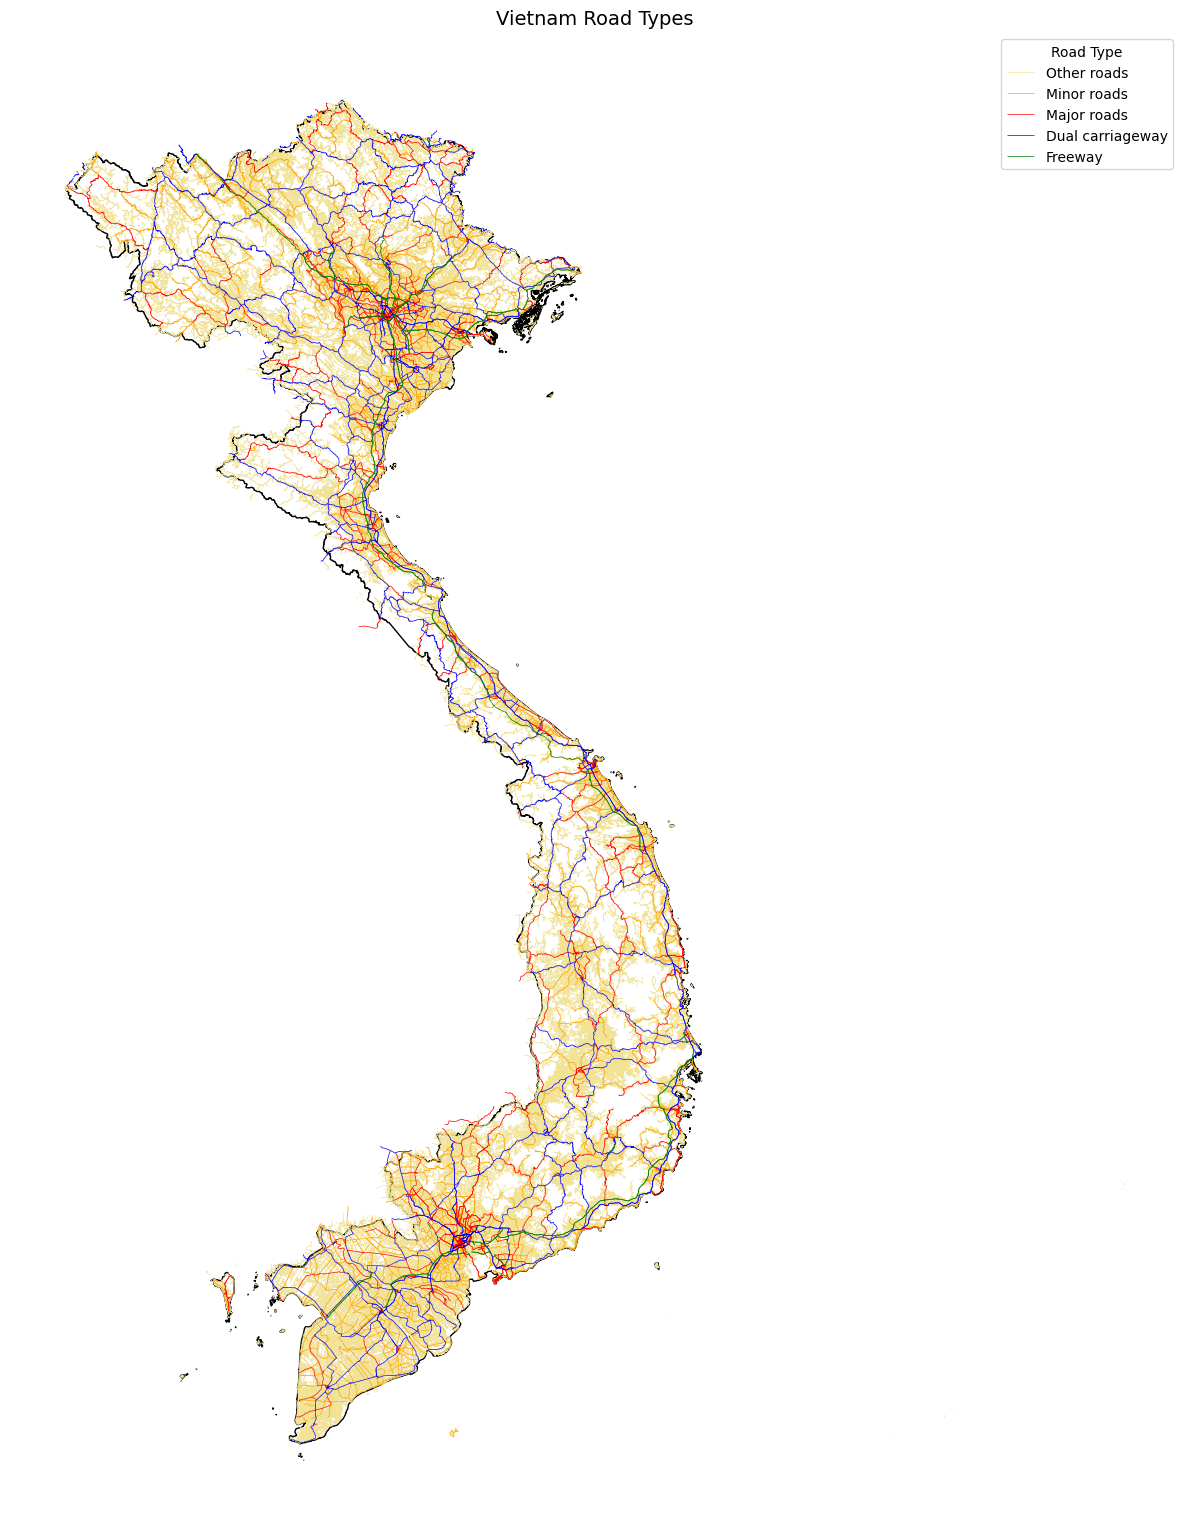

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

#Load road shapefile
roads_fp = r"C:\Users\liamt\Documents\GitHub\problem-set-2\Problem Set 2\Data\Vietnam\Road Data and Boundary Data\vietnam-latest-free.shp\gis_osm_roads_free_1.shp"
roads = gpd.read_file(roads_fp)

#Load Vietnam boundary
admin_fp = r"C:\Users\liamt\Documents\GitHub\problem-set-2\Problem Set 2\Data\Vietnam\Road Data and Boundary Data\gadm41_VNM_shp\gadm41_VNM_0.shp"
vietnam_boundary = gpd.read_file(admin_fp)

#define road categories
road_categories = {
    'Freeway': ['motorway', 'motorway_link'],
    'Dual carriageway': ['trunk', 'trunk_link'],
    'Major roads': ['primary', 'primary_link'],
    'Minor roads': ['secondary', 'secondary_link'],
    'Other roads': ['tertiary', 'tertiary_link', 'residential', 'unclassified', 'road']
}

#assign category to each road
def classify_road(fclass):
    for category, types in road_categories.items():
        if fclass in types:
            return category
    return 'Other roads'

roads['road_type'] = roads['fclass'].apply(classify_road)

#plot
fig, ax = plt.subplots(figsize=(12, 16))

#plot boundary
vietnam_boundary.boundary.plot(ax=ax, color='black', linewidth=1, zorder=1)

#softer yellow for "Other roads"
colors = {
    'Freeway': 'green',
    'Dual carriageway': 'blue',
    'Major roads': 'red',
    'Minor roads': 'orange',
    'Other roads': '#f2e394'
}

#plot roads by type with proper layering
for rtype in ['Other roads', 'Minor roads', 'Major roads', 'Dual carriageway', 'Freeway']:
    roads[roads['road_type'] == rtype].plot(
        ax=ax, color=colors[rtype], linewidth=0.5, label=rtype, zorder=2
    )

#labels and legend
plt.legend(title='Road Type')
plt.title("Vietnam Road Types", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


Vietnam was really tricky at first, but after experimenting and matching with the right data and shapefiles, I was able to recreate it, however it may not be 100% identical to the figure provided. I feel like I had more of a challenge with finding the data rather than making the code itself. So to start, in importing the libraries, I used geopandas for the geospatial vector data and matplotlib.pyplot for the plotting and visualization of the data. After that, I did standard coding for loading the shapefiles. I also defined the road categories the best way I could, I made it more organized as well. Then, I classified the roads wherein I mapped each road's fclass to one of the give broader categories. I also added a new column called road_type to the roads GeoDataFrame by applying the classification function to each road. The I started the plotting and continued with the national boundary wherein I made the code draw the outer boundary of Vietnam using think black lines. I also experimented a little with the color schemes, especially the yellow color because it was too loud compared to the one in the original figure. Then, I plotted each road type wherein it loops through each category and plotted it on the same ax. I also plotted the roads in a specific order to ensure that the main roads are not hidden behind the minor ones. Lastly, I added the labels, layouts and legends for visual aid. 

# Figure 1: Brazil's Capital and Main Road Infrastructure.

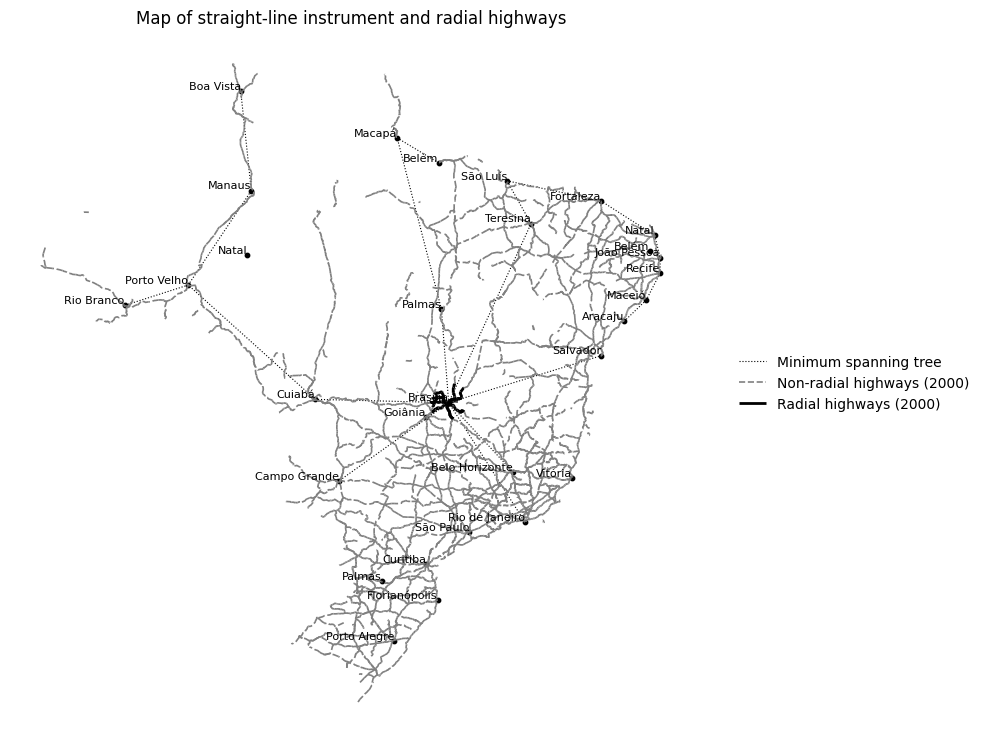

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import LineString



#load Brazil highways shapefile
roads = gpd.read_file(r"C:\Users\liamt\Documents\GitHub\problem-set-2\Problem Set 2\Data\Brazil\Data\GIS_data\roads\2010\highways_2010_prj.shp")

#Load world cities and filter to Brazil
cities = pd.read_csv(r"C:\Users\liamt\Documents\GitHub\problem-set-2\Problem Set 2\Data\Brazil\Data\simplemaps_worldcities_basicv1.901\worldcities.csv")
cities = cities[cities['country'] == 'Brazil']

#define main cities from the figure
main_cities = [
    'Brasília', 'São Paulo', 'Rio de Janeiro', 'Salvador', 'Belo Horizonte', 'Fortaleza',
    'Recife', 'Curitiba', 'Porto Alegre', 'Goiânia', 'Belém', 'Manaus', 'Cuiabá',
    'Campo Grande', 'Natal', 'São Luís', 'Aracaju', 'Maceió', 'João Pessoa', 'Teresina',
    'Macapá', 'Boa Vista', 'Palmas', 'Florianópolis', 'Vitória', 'Rio Branco', 'Porto Velho'
]
cities = cities[cities['city'].isin(main_cities)]

#convert to GeoDataFrame
cities_gdf = gpd.GeoDataFrame(
    cities,
    geometry=gpd.points_from_xy(cities['lng'], cities['lat']),
    crs="EPSG:4326"
)

#classify Radial vs Non-Radial Roads

#get Brasília point and define buffer
brasilia_point = cities_gdf[cities_gdf['city'] == 'Brasília'].geometry.iloc[0]
brasilia_buffer = brasilia_point.buffer(1)  # degrees

#assign road type
roads['type'] = roads.geometry.apply(
    lambda geom: 'radial' if geom.intersects(brasilia_buffer) else 'non-radial'
)

#manually Define MST Edges (Dotted Lines)
manual_edges = [
    ('Brasília', 'Rio de Janeiro'),
    ('Brasília', 'Belo Horizonte'),
    ('Brasília', 'Salvador'),
    ('Brasília', 'Teresina'),
    ('Brasília', 'Palmas'),
    ('Brasília', 'Goiânia'),
    ('Brasília', 'Cuiabá'),
    ('Brasília', 'Campo Grande'),
    ('Palmas', 'Macapá'),
    ('Macapá', 'Belém'),
    ('Teresina', 'São Luís'),
    ('São Luís', 'Fortaleza'),
    ('Fortaleza', 'Natal'),
    ('Natal', 'João Pessoa'),
    ('João Pessoa', 'Recife'),
    ('Recife', 'Maceió'),
    ('Maceió', 'Aracaju'),
    ('Cuiabá', 'Porto Velho'),
    ('Porto Velho', 'Manaus'),
    ('Manaus', 'Boa Vista'),
    ('Porto Velho', 'Rio Branco')
]

mst_lines = []
for u, v in manual_edges:
    point_u = cities_gdf[cities_gdf.city == u].geometry.values[0]
    point_v = cities_gdf[cities_gdf.city == v].geometry.values[0]
    line = LineString([point_u, point_v])
    mst_lines.append({'geometry': line})
mst_gdf = gpd.GeoDataFrame(mst_lines, crs="EPSG:4326")

#plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

#plot MST
mst_gdf.plot(ax=ax, linestyle=':', color='black', linewidth=0.8, label='Minimum spanning tree')

#plot roads
roads[roads['type'] == 'non-radial'].plot(ax=ax, linestyle='--', color='gray', linewidth=1.2, label='Non-radial highways (2000)')
roads[roads['type'] == 'radial'].plot(ax=ax, linestyle='-', color='black', linewidth=2, label='Radial highways (2000)')

#plot cities
cities_gdf.plot(ax=ax, color='black', markersize=10)

#add city labels
for x, y, label in zip(cities_gdf.geometry.x, cities_gdf.geometry.y, cities_gdf.city):
    ax.text(x, y, label, fontsize=8, ha='right', va='bottom')

#labels and stuff
ax.set_title("Map of straight-line instrument and radial highways", fontsize=12)
ax.axis('off')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)
plt.tight_layout()
plt.show()


Brazil's figure was a breeze to make because it lacked a lot of details in the color, however I couldn't seem to recreate the exact routes such as the one in the given figure. To start with the imports, I used geopandas for the spatial data, pandas for the tabular data and CSV files, matplotlib.pyplot for plotting, shapely for working with geometries such as the straight lines. Then, I loaded Brazil's road network through its shapefile that I was able to find online. Then, I loaded its global cities dataset, keeping only cities located in Brazil. Then, I manually filtered the cities to include only those that were shown in the figure that we needed to recreate. Then, I converted the cities DataFrame into GeoDataFrame using longitude/latitude coordinates. After that I classified roads as radial or non-radial. This was to extract Brasilia's location because in the figure, it seemed that the routes were all pointing to this specific city so I tried to recreate it. Then, I built a circular buffer around it. This classifies any road that intersects this buffer as radial and others as non-radial. Then, I manually defined MST routes to list pair of cities that should be connected wth straight dashed lines. Then, I plotted everything, such as MST as the dotted lines, non-radial highways as dashed gray lines, radial highways as solid black lines and cities as black dots. Then, I labeled each city and formatted the map. 

Notes for improvement: I can't seem to figure out how to replicate the specific routes that were provided in the example we need to recreate. 